In [ ]:
# Heart Disease classification using machine learning algorithms like SupportVectorMachines(SVM), K-NearestNeighbors(KNN), Decisiontree, linearregression, randomforest, etc.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
import pickle

In [4]:
# Load data
data = pd.read_csv("heart.csv")  # Replace "heart.csv" with your downloaded file path


# Check column names (optional)
print(data.columns)

categorical_features = [
    col for col in ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']  # Adjust based on actual names
    if col in data.columns  # Only include columns present in the data
]

for feature in categorical_features:
    data = pd.get_dummies(data, columns=[feature])
    
    
    



Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [19]:
# Summary statistics for all columns
print(data.describe())

            target       age_29       age_34       age_35       age_37  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.513171     0.003902     0.005854     0.014634     0.005854   
std       0.500070     0.062378     0.076322     0.120142     0.076322   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            age_38       age_39       age_40       age_41       age_42  ...  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000  ...   
mean      0.011707     0.013659     0.010732     0.031220     0.025366  ...   
std       0.107618     0.116126     0.103087     0.173995     0.157310  ...   
min       0.00000

In [5]:
# Separate features and target variable
X = data.drop("target", axis=1)
y = data["target"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Define and evaluate different models
models = []
models.append(("SVM", SVC(kernel="linear")))
models.append(("KNN", KNeighborsClassifier(n_neighbors=5)))
models.append(("Decision Tree", DecisionTreeClassifier(max_depth=3)))
models.append(("Logistic Regression", LogisticRegression()))
models.append(("Random Forest", RandomForestClassifier(n_estimators=100)))

for name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on testing data
    y_pred = model.predict(X_test)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"** Model: {name} **")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("-" * 30)
    
    


# Choose the best model based on your evaluation criteria



** Model: SVM **
Accuracy: 0.9854
Precision: 1.0000
Recall: 0.9709
F1-Score: 0.9852
------------------------------
** Model: KNN **
Accuracy: 0.7707
Precision: 0.7593
Recall: 0.7961
F1-Score: 0.7773
------------------------------
** Model: Decision Tree **
Accuracy: 0.8146
Precision: 0.7928
Recall: 0.8544
F1-Score: 0.8224
------------------------------
** Model: Logistic Regression **
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
------------------------------
** Model: Random Forest **
Accuracy: 0.9854
Precision: 1.0000
Recall: 0.9709
F1-Score: 0.9852
------------------------------


In [7]:
# Lists to store metrics for each model
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

for name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on testing data
    y_pred = model.predict(X_test)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store metrics for plotting
    model_names.append(name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

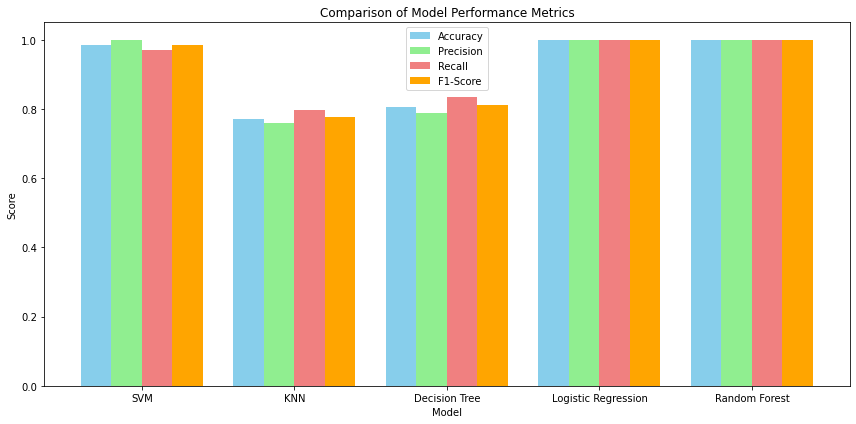

In [8]:
# Set up bar chart for comparison
x = np.arange(len(model_names))  # Label locations

# Plotting the metrics
plt.figure(figsize=(12, 6))

# Accuracy
plt.bar(x - 0.3, accuracies, width=0.2, label='Accuracy', color='skyblue')
# Precision
plt.bar(x - 0.1, precisions, width=0.2, label='Precision', color='lightgreen')
# Recall
plt.bar(x + 0.1, recalls, width=0.2, label='Recall', color='lightcoral')
# F1 Score
plt.bar(x + 0.3, f1_scores, width=0.2, label='F1-Score', color='orange')

# Add labels and title
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Comparison of Model Performance Metrics")
plt.xticks(x, model_names)  # Add model names as x-axis labels
plt.legend()
plt.tight_layout()
plt.show()


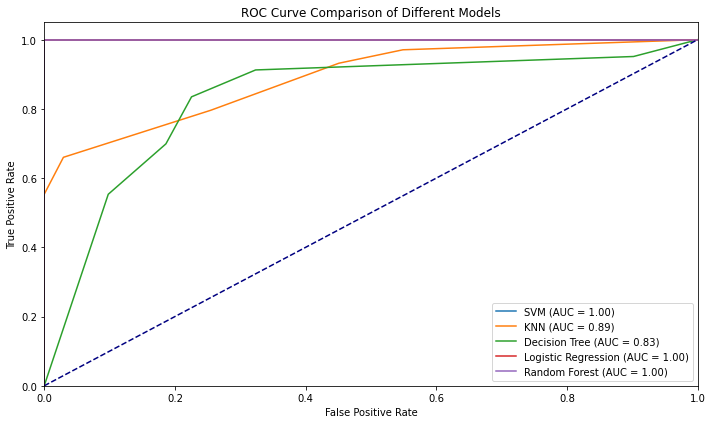

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

plt.figure(figsize=(10, 6))

for name, model in models:
    # Check if the model has a predict_proba method
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # Use probabilities for ROC curve
    else:
        y_prob = model.decision_function(X_test)  # For SVMs, use decision function
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Different Models')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [11]:
# Sample prediction (assuming X_test has new data)
# Choose the model you want to use for prediction (e.g., best performing model)
chosen_model = models[4][1]  # Assuming the  model (random forest) is chosen 


#Here we are using random forest for prediction based on the accuracy score

# Select a sample from testing data
new_data = X_test[56, :]  # Use NumPy indexing instead of iloc

# Predict using the chosen model
new_data_pred = chosen_model.predict([new_data])



In [12]:
# saving the model

with open('chosen_model.pkl', 'wb') as file:
    pickle.dump(chosen_model, file)

In [13]:
print("\nSample Prediction:")
if new_data_pred[0] == 1:
    print("Predicted: Person has heart disease")
else:
    print("Predicted: Person is less likely to have heart disease")

print("Note: This is just a prediction based on the model. Always consult a medical professional for diagnosis and treatment.")


Sample Prediction:
Predicted: Person is less likely to have heart disease
Note: This is just a prediction based on the model. Always consult a medical professional for diagnosis and treatment.
